## This is a visualizer for fragment explain result,
## to re explain fragment for the whole dataset,please run fragment_explain.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = 'fragment_explain_result/'
path_list = ['001','002','003']
n_f = []
frag_score_scale = []

In [3]:
# loaded explained data
for path in path_list:
    f_raw = np.load(root + path + '/frag_importance_raw.npy',allow_pickle = True)
    f_mean = np.load(root + path + '/frag_importance_mean.npy',allow_pickle = True)
    n_f_sub = np.load(root + path + '/node_feat_imp.npy',allow_pickle = False)
    
    frag_smiles = []
    frag_score = []
    F_mean = f_mean.item()

    for frag in F_mean:
        frag_smiles.append(frag)
        frag_score.append(F_mean[frag])
    frag_smiles[-1] = '[MPY]'
    frag_smiles[-2] = '[MMIM]'
    frag_smiles = np.array(frag_smiles)
    frag_score_scale_sub = np.array(frag_score) * 1000 + 10
    
    n_f.append(n_f_sub)
    frag_score_scale.append(frag_score_scale_sub)

In [4]:
n_f = np.array(n_f).mean(axis = 0)
frag_score_scale = np.array(frag_score_scale).mean(axis = 0)

In [5]:
frag_smiles

array(['[OH]', '[NH3]', '[NH2]', '[NH]', '[CH]', '[CH2]', '[CH3]', '[N]',
       'OC', 'C(F)F', 'C(F)(F)F', '[P]', '[S]', '[MMIM]', '[MPY]'],
      dtype='<U8')

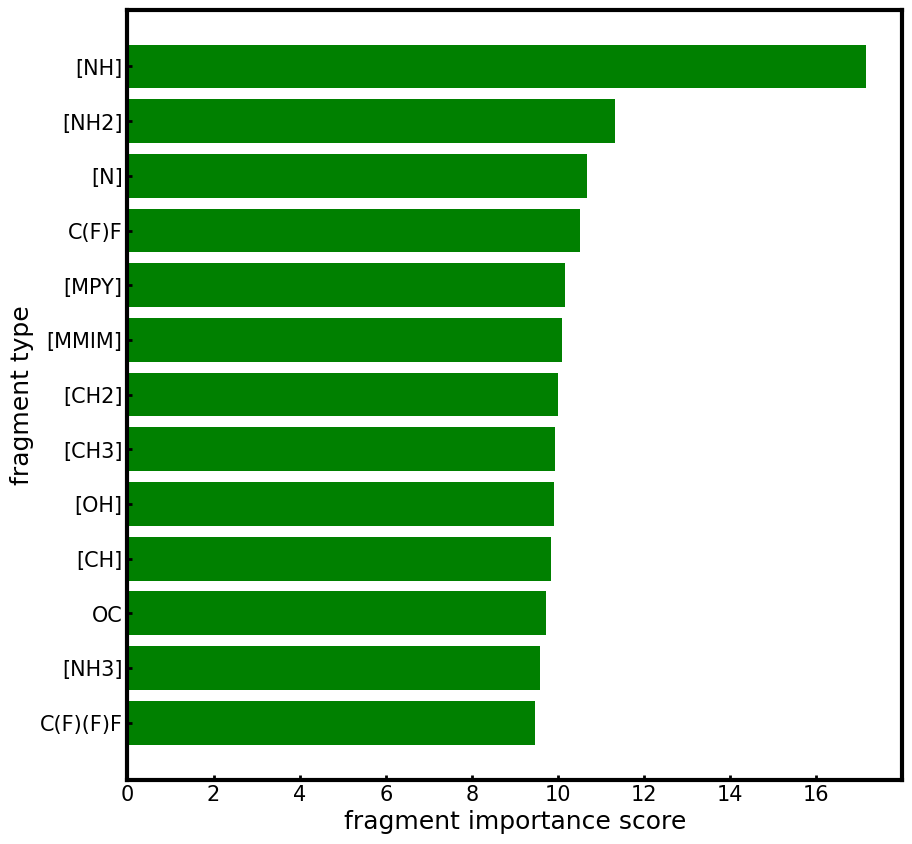

In [6]:
# plot fragment importance
plt.figure(figsize = (10,10))
np.random.seed(19680801)

sorted_idx = frag_score_scale.argsort()
temp = list(sorted_idx)
temp.pop(-2)
temp.pop(-4)
sorted_idx = np.array(temp)

plt.barh(frag_smiles[sorted_idx], frag_score_scale[sorted_idx],color = 'green')

plt.xlabel('fragment importance score', fontsize=18)
plt.ylabel('fragment type', fontsize=18)
plt.tick_params(direction='in', width=2,labelsize = 15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

plt.savefig(fname = "fragment_score")

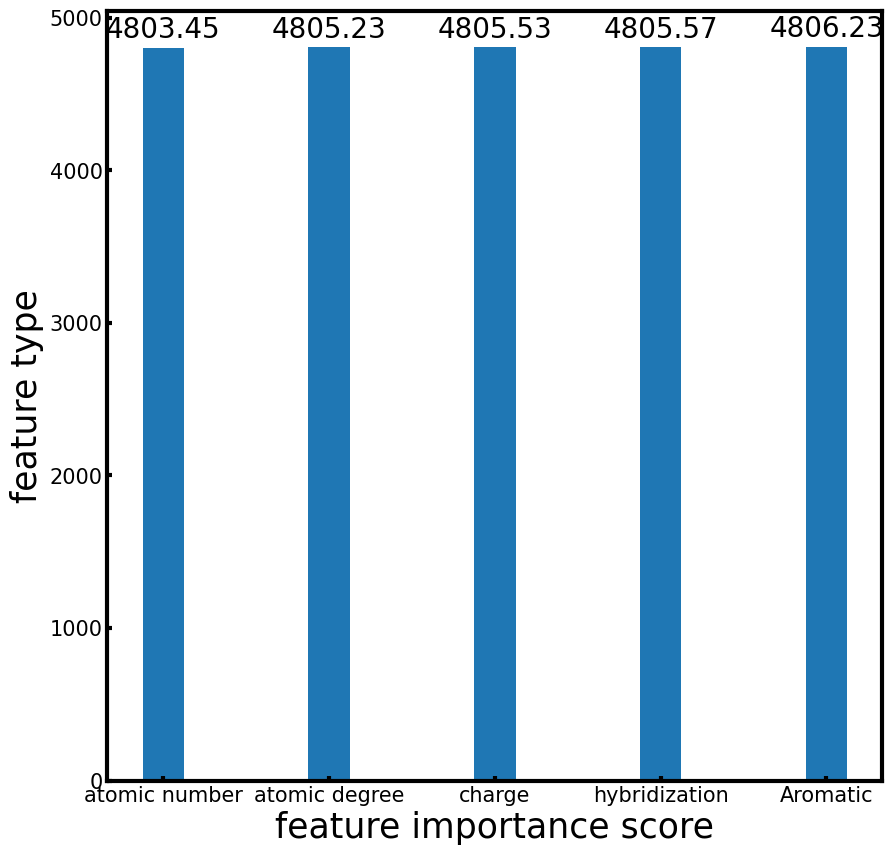

In [7]:
# plotting node feature explanation
feat = np.array(['atomic number','hybridization','Aromatic','atomic degree','charge'])
N_f = np.array(n_f) 
x = np.arange(len(feat))  # the label locations

fig = plt.figure(figsize = (10,10))

sorted_idx_pr = N_f.argsort()

width = 0.25  # the width of the bars

rects = plt.bar(x, N_f[sorted_idx_pr], width)
ax = plt.gca()
ax.set_xticks(x, feat[sorted_idx_pr])
# plt.barh(feat[sorted_idx_pr],N_f[sorted_idx_pr])
plt.xlabel('feature importance score', fontsize=25)
plt.ylabel('feature type', fontsize=25)
plt.tick_params(direction='in', width=3,labelsize = 15)

plt.bar_label(rects, padding=3,fontsize = 20)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)


plt.savefig(fname = "node_feature")